# Patch Extraction

Click to open in:  \[[GitHub](https://github.com/DIDSR/wsi_processing_toolbox/03_patch_extraction.ipynb)\]

Developer: Seyed.kahaki@fda.hhs.gov

## Patch Extraction Demo
This demonstration guides you through the process of using WSIToolbox to extract patches within annotations. This feature enabled using the patch_extraction method. 

## Environment Configuration
Please follow the instruction provided in the Installation section to install related dependencies. If this isn't your first time running this code and you have all these packages installed, you can skip to the next step. If you choose to run it regardless, you might encounter an error message; however, this won't negatively impact your session. On Jupyter Notebook, this cell is responsible for installing required packages for patch extraction module. If you haven’t installed the packages based on the instruction provided for the WSI Reader module, please install these packages as well

In [1]:
# to check the python version
from platform import python_version
print(python_version())
#pip install mpmath==1.2.1
#pip install lxml==4.9.1
#!apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail --line 1
#pip install cv2== 4.5.3
#pip install openslide-python==1.1.2
#pip install Shapely==1.7.1
#pip install tifffile==2022.10.10
#pip install random
#pip install glob
print("Installation is done.")

3.8.8
Installation is done.


## Cleaning up residual files from prior sessions

The following cell will delete the output directory (for example: C:/Users/data), assuming it exists due to an earlier run of this notebook. If this is your initial run, you can disregard this step.

In [2]:
#![ -d 'C:/Users/data' ] && ( echo "deleting tmp directory"; rm -rf 'C:/Users/data' )

## Loading Required Packages

In this step, we will import several Python modules that are needed for our analysis.


In [3]:
import os
from WSI.readwsi import WSIReader
from WSI.patch import WSIpatch_extractor
from WSI.patch import PatchExtractor
import matplotlib.pyplot as plt

## Patch extraction from annotated area
In this demonstration, we show you how to extract image patches from the annotated region of the WSI. We do this by using WSIToolbox's PatchExtractor class. This step should be run after extracting the annotated area of the WSI. If you haven't extract the annotations, in order to extract the image patches. please follow the steps in this Notebook github.com/DIDSR/wsi_processing_toolbox/02_annotation_extraction.ipynb. After extracting the image patches, you can call the gen_patch method from the annotation.patch_extractor class to extract image patches. Please make sure that you imported the PatchExtractor class using "from annotation.patch_extractor import PatchExtractor". Please run the following code to generate image patches from the annotated area.

In [4]:
PatchExtractor = PatchExtractor()

>>>>>>>>>
['C:/DATA/0_Washu-Aperio/input_output\\CMU-1-Small-Region']
C:/DATA/0_Washu-Aperio/out_dir/data/png_files/


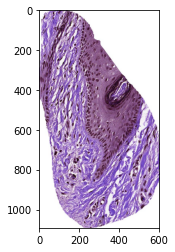

(1092, 603, 3)
C:/DATA/0_Washu-Aperio/out_dir/data/png_files/
Creating C:/DATA/0_Washu-Aperio/out_dir/data/png_files/CMU-1-Small-Region/0_CMU-1-Small-Region_x_1130_y_2364_a_100.00.png
C:/DATA/0_Washu-Aperio/out_dir/data/png_files/
Creating C:/DATA/0_Washu-Aperio/out_dir/data/png_files/CMU-1-Small-Region/1_CMU-1-Small-Region_x_1088_y_2441_a_100.00.png
C:/DATA/0_Washu-Aperio/out_dir/data/png_files/
Creating C:/DATA/0_Washu-Aperio/out_dir/data/png_files/CMU-1-Small-Region/2_CMU-1-Small-Region_x_1039_y_2455_a_100.00.png
C:/DATA/0_Washu-Aperio/out_dir/data/png_files/
Creating C:/DATA/0_Washu-Aperio/out_dir/data/png_files/CMU-1-Small-Region/3_CMU-1-Small-Region_x_992_y_2242_a_100.00.png
C:/DATA/0_Washu-Aperio/out_dir/data/png_files/
Creating C:/DATA/0_Washu-Aperio/out_dir/data/png_files/CMU-1-Small-Region/4_CMU-1-Small-Region_x_1157_y_2323_a_100.00.png
C:/DATA/0_Washu-Aperio/out_dir/data/png_files/
Creating C:/DATA/0_Washu-Aperio/out_dir/data/png_files/CMU-1-Small-Region/5_CMU-1-Small-Region

In [7]:
INPUTDIR = 'C:/DATA/0_Washu-Aperio/input_output/'
PatchSize = (255,255)
Number_of_Patches = 10
OUTPUTDIR = 'C:/DATA/0_Washu-Aperio/out_dir/'
intensity_check = True
intensity_threshold = 250

PatchExtractor.gen_patch(INPUTDIR,PatchSize,Number_of_Patches,intensity_check,intensity_threshold,OUTPUTDIR)



## Patch Extraction from the entire WSI
In this section, we load a WSI and create the WSI object. This is enabled using the wsi_reader method in the ReadWsi package. For this, we will set up a directory which contains our WSI files, we will create a list in Python and append WSI names in this list and load the WSI using the wsi_reader using an index. 

### Read WSI

In [ ]:
while True:
    
    # loading input directory
    dir_file = input(r"Please enter the file directory, for example: C:\DATA\0_Washu-Aperio\: ")
    # Getting the wsi file name
    file_name = input("Please enter the file name, for example: aperio-002-0.svs:")
    print("\n")
    path = os.path.join(dir_file, file_name)
    
    #Checking folder availability 
    if os.path.exists(path):
        # reading wsi file 
        wsi_obj =WSIReader.wsi_reader(path)
        break
    else:
        print("File path error!" )

print(" Done...")

After reading the WSI using the wsi_reader, we have an object which has the loaded WSI. To validate if the object is loaded correctly, we print the object and also print the available pyramid levels of the WSI using the “.level_dimensions” method. 

In [ ]:
#wsi_obj =ReadWsi.wsi_reader('C:/DATA/0_Washu-Aperio/aperio-002-0.svs')
print(wsi_obj)
print(wsi_obj.level_dimensions)

### Thumbnail Visualization

To see a thumbnail of the WSI, we use the get_thumbnail method of wsi_reader. We load the thumbnail as follows:

In [ ]:
###################################  WSI thumbnail code to show the WSI in small size

#Getting the thumbnail size from the user
size_ = [int (input("Please enter x-size in pixels, for example: 600 ... ")),int (input("Please enter y-size in pixels, for example: 300 ..."))]
#for example: size_ = (600,300)

#Getting the thumbnail 
tile= wsi_obj.get_thumbnail(size=size_)

plt.imshow(tile)
plt.title("WSI thumbnail")

### Extract Image Patches from the WSI

In [ ]:
while True:
    intensity_threshold = 250
    std_threshold = 15
    #Setting the patch size
    patchsize = int(input(r"Please enter the patch size, for example 255: "))
    
    #Setting the output directory
    output_directory = input(r"Please enter the output directory, for example C:/DATA/0_Washu-Aperio/out_dir/:")
    
    
    # Setting the random state. 
    #       1: Extract patches randomly from the whole slide image. In this case, please make sure that you entered
    #          the maximum number of patches to be extracted
    #       0: Extract patches starting from the beginning of the whole slide image
    
    random = int(input(r"Please enter set the random variable (1 = randomize ,  0 = non-randomized)"))
    if random==1 :
        random= True
    if random==0 :
        random= False
    else:
        print('random_state sets incorrectly!')
            
        
    # Setting the number of image patches to be extracted   
    num_patches = int(input(r"Please enter the number of pathces. Enter -1 to extract all available patches:"))
    
    #  Setting the visualization parameter:
    #  0: Do not plot image patches
    #  1: Ploting the image patches
    visualize = int(input("Would like to display image patches? (1 = yes,   0 = no): "))
    if visualize==1 :
        visualize= True
    if visualize==0 :
        visualize= False
    
    
    # Setting the intensity check parameter:
    # 1: exclude empty patches based on mean intensity of the image patch
    # 0: Do not exclude any patch
    intensity_check = int(input("Only include patches with high intestity? (1 = yes,   0 = no): "))
    if intensity_check==1 :
        random_state= True
    if intensity_check==0 :
        random_state= False
    
    print("\n")
    
    #Checking folder availability
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    WSIpatch_extractor.patch_extraction(wsi_obj,patchsize,output_directory,random,visualize,intensity_check,intensity_threshold,std_threshold,num_patches)


### Extracting few (100) image patches

In [ ]:
print("\n**********************< Extract few patches from WSI (non-overlapping) >************************\n")
patchsize = 256
output_directory = "C:/DATA/0_Washu-Aperio/out_dir/"
random= False
visualize = True
intensity_check = False
num_patches = 10 # set to -1 to extract all patches
intensity_threshold = 250
std_threshold = 15

WSIpatch_extractor.patch_extraction(wsi_obj,patchsize,output_directory,random,visualize,intensity_check,intensity_threshold,std_threshold,num_patches)

